In [1]:
import warnings
warnings.filterwarnings("ignore")

import os.path
import ssm
import pickle
import numpy as np
import pandas as pd
import scipy
import copy
from tqdm import tqdm

from runwise_ts_log_data import get_ts_log_data_blocked

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import to_rgba
import seaborn as sns

from sympy.utilities.iterables import multiset_permutations
from ssm.util import *
from scipy.stats import ttest_ind,wilcoxon,ranksums

In [2]:
df_cols = ['ELBO','D','epoch','resample']
df_data = {col:[] for col in df_cols}

In [3]:
K = 6
N = 85
M = 20
num_subjs = 92

for D,num_resamples in zip([5,10,15],[50,100,60]):#zip([15],[50])
    for idx_resample in range(1,num_resamples+1):
        with open(f'pkl/rslds_emoprox2_K{K}_D{D}_N{N}_{num_subjs}subjs_resample{idx_resample}.pkl','rb') as f:
            model,q,elbos,resampled_subj_list = pickle.load(f)
        for t,val in enumerate(elbos):
            df_data['D'].append(D)
            df_data['ELBO'].append(val)
            df_data['epoch'].append(t)
            df_data['resample'].append(idx_resample)

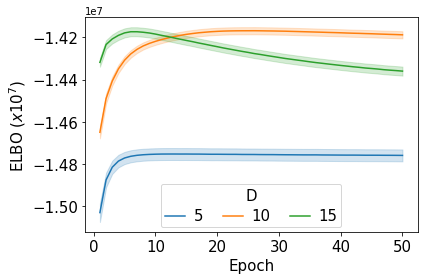

In [4]:
df = pd.DataFrame(df_data)
df = df[df['epoch']>0]
fig = plt.figure(figsize=(6,4))
ax = sns.lineplot(data=df,x='epoch',y='ELBO',hue='D',errorbar='se',palette=sns.color_palette("tab10"),legend='full')
ax.set_xlabel("Epoch",fontsize=15)
ax.set_ylabel("ELBO ($x10^7$)",fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(loc='lower center',title='D',ncol=3)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
fig.tight_layout()
# fig.savefig(f'figures/fig_ELBO_varying_D.jpg',dpi=600,bbox_inches='tight')